 # Import Libraries
 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn theme for consistent plots
sns.set(style='whitegrid')  
sns.set_palette("Set2")

# Load dataset


In [13]:
df = pd.read_csv('C:\\Users\\kashi\\Downloads\\train.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Basic Dataset Information

In [14]:
df.shape  # Rows and columns
df.columns  # Column names
df.info()  # Data types and non-null values
df.describe(include='all')  # Descriptive statistics
df.isnull().sum()  # Count of missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Data Cleaning 

In [24]:
df.loc[:, 'Age'] = df['Age'].fillna(df['Age'].median())
df.loc[:, 'Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df = df.drop(columns=['Cabin'], errors='ignore')
print(df.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


# Univariate Analysis

###  Categorical Features

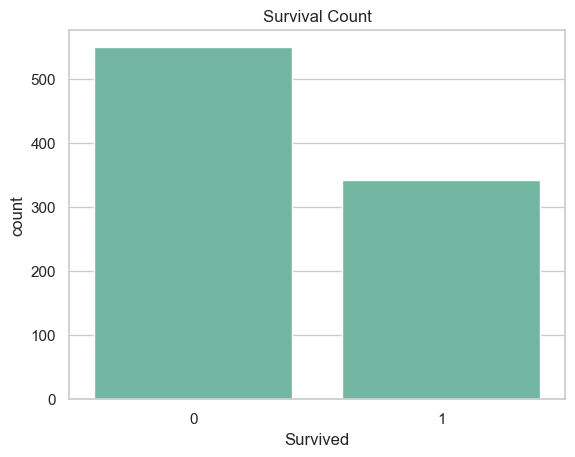

In [27]:
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()

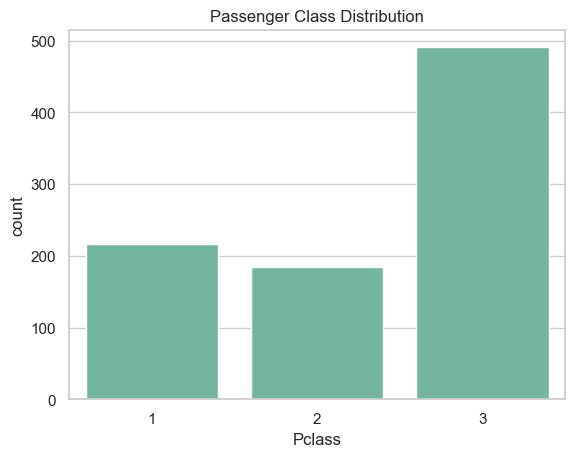

In [28]:
sns.countplot(x='Pclass', data=df)
plt.title("Passenger Class Distribution")
plt.show()

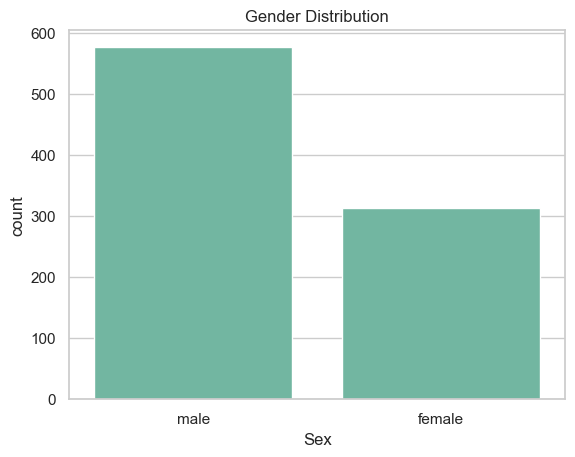

In [29]:
sns.countplot(x='Sex', data=df)
plt.title("Gender Distribution")
plt.show()

### Numerical Features

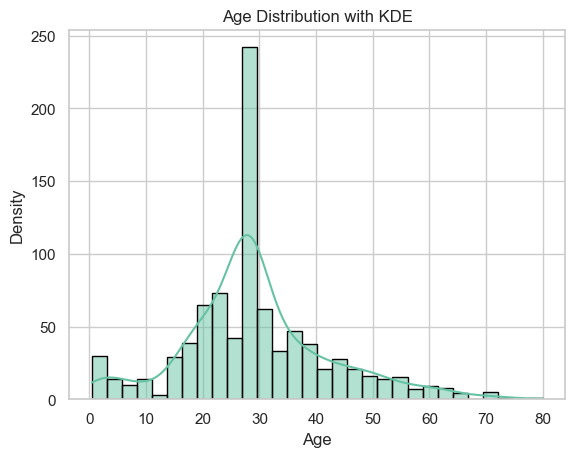

In [43]:
sns.histplot(df['Age'], bins=30, kde=True, edgecolor='black')
plt.title("Age Distribution with KDE")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()




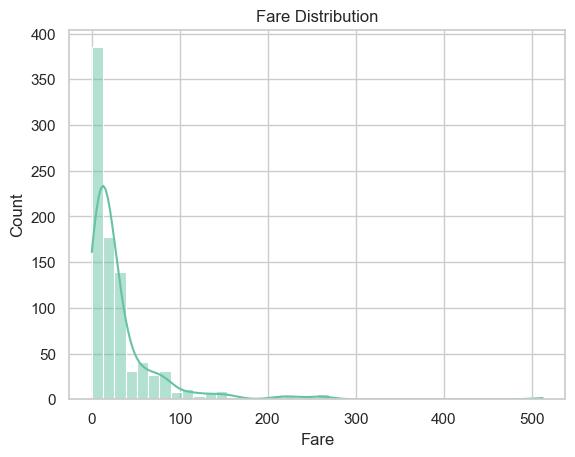

In [31]:
sns.histplot(df['Fare'], bins=40, kde=True)
plt.title("Fare Distribution")
plt.show()


# Bivariate Analysis


### Categorical vs Target

Text(0.5, 1.0, 'Survival Rate by Sex')

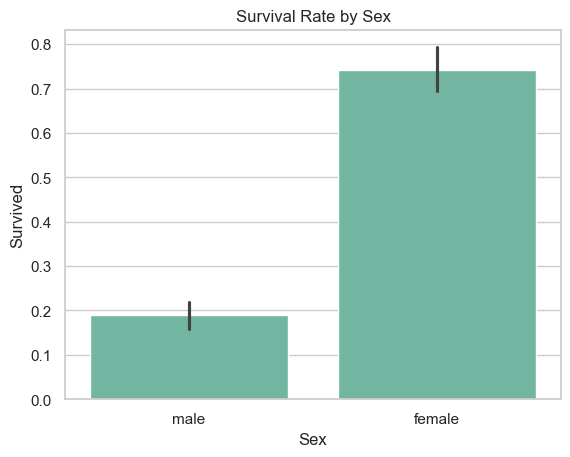

In [33]:
sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Survival Rate by Sex")

Text(0.5, 1.0, 'Survival Rate by Passenger Class')

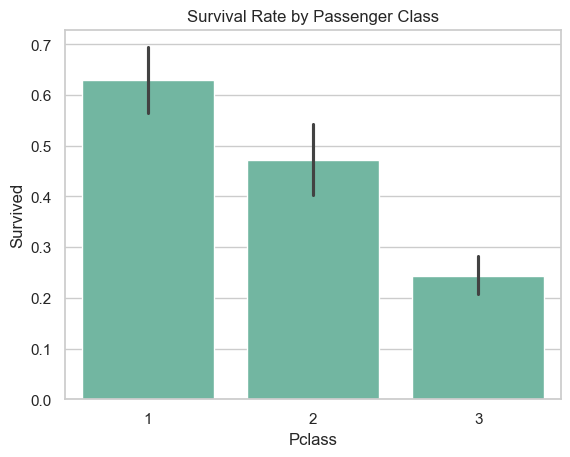

In [34]:

sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival Rate by Passenger Class")


Text(0.5, 1.0, 'Survival Rate by Port of Embarkation')

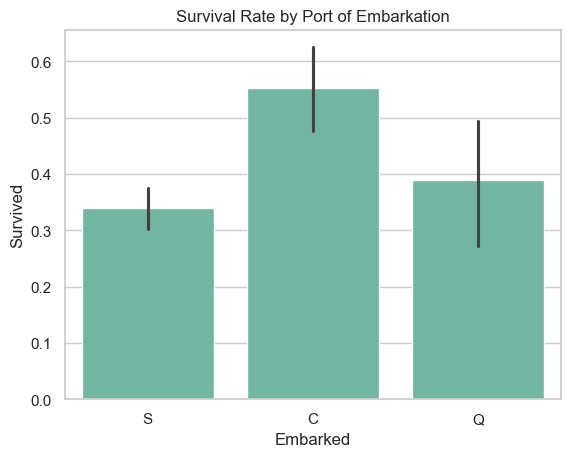

In [35]:
sns.barplot(x='Embarked', y='Survived', data=df)
plt.title("Survival Rate by Port of Embarkation")

### Numerical vs Target

Text(0.5, 1.0, 'Age vs Survival')

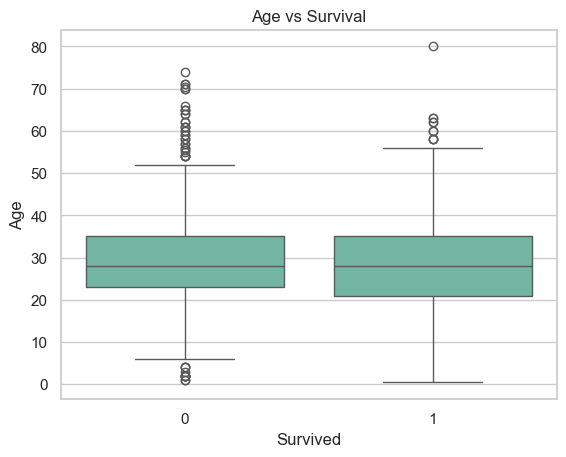

In [36]:
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Age vs Survival")

# Multivariate Analysis

### Correlation Heatmap

In [40]:
numeric_df = df.select_dtypes(include=['number'])

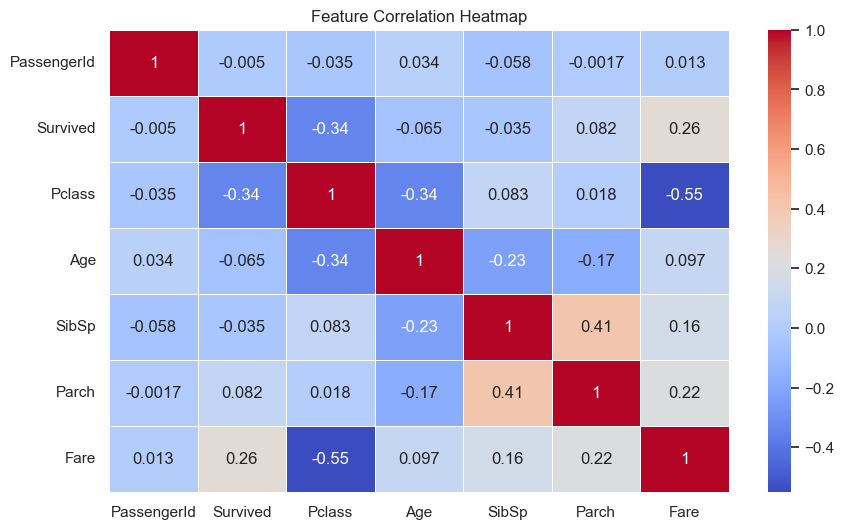

In [41]:
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


### Pairplot

Text(0.5, 1.02, 'Pairplot of Key Features')

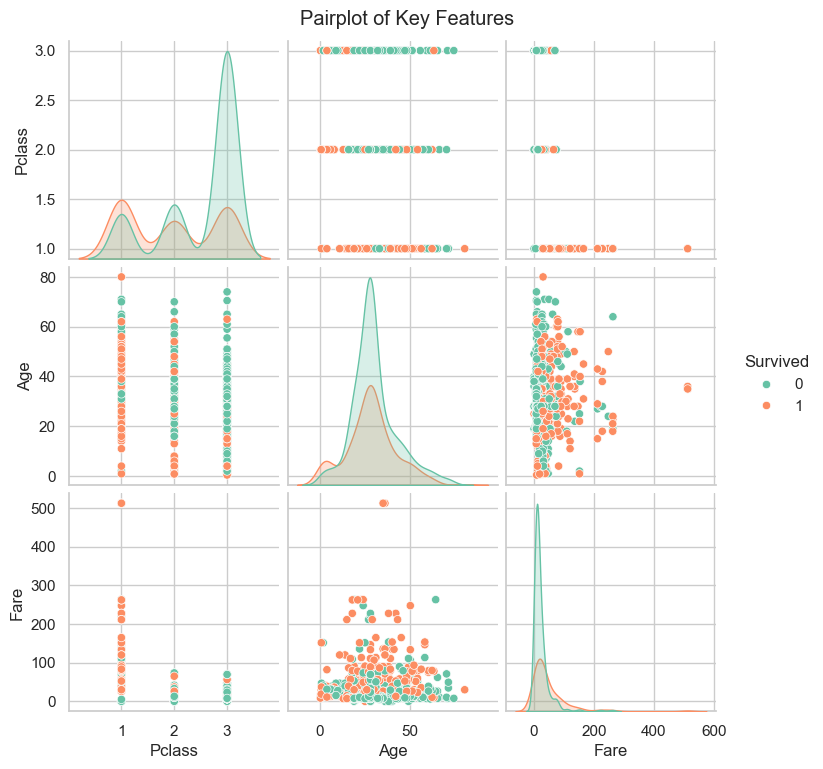

In [42]:
sns.pairplot(df[['Survived', 'Pclass', 'Age', 'Fare']], hue='Survived')
plt.suptitle("Pairplot of Key Features", y=1.02)